# PyTorch

[pytorch](http://pytorch.org/) is a new framework for efficient tesnor processing and dynamic computational graphs - both of which are required for Deep Learning applications and research. `pytorch` feels much more pythonic and easy to use compared to [tensorflow](https://www.tensorflow.org/).

The best place to start is this notebook: [Deep Learning with PyTorch: a 60-minute blitz](https://github.com/pytorch/tutorials/blob/master/Deep%20Learning%20with%20PyTorch.ipynb)

In this notebook, I plan to cover the following topics:
* Simple Linear Regression
* [WIP] word2vec
* [WIP] GloVe
* [WIP] Variational Autoencoder

In [1]:
%matplotlib inline
from torch.autograd import Variable, Function

import collections
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import torch
import torch.nn.functional as F

## Linear Regression

Steps:
1. Generate dummy data.
2. Use a single Linear layer for regression.
3. Use Adam optimizer on the final MSELoss to propagate back the gradients.

Finally, we plot the predicted values against the actual values. For comparison, we plot the scikit-learn LinearRegression prediction as well.

Please note that evaluation is in-sample - which is generally not recommended for any real use case. However, we took this liberty because the aim is to see some simple examples of `pytorch`.

Loss: 1.163705 Batch: 0
Loss: 1.052935 Batch: 1
Loss: 0.954127 Batch: 2
Loss: 0.867369 Batch: 3
Loss: 0.792567 Batch: 4
Loss: 0.729366 Batch: 5
Loss: 0.677084 Batch: 6
Loss: 0.634664 Batch: 7
Loss: 0.600693 Batch: 8
Loss: 0.573507 Batch: 9
Loss: 0.551385 Batch: 10
Loss: 0.532758 Batch: 11
Loss: 0.516370 Batch: 12
Loss: 0.501342 Batch: 13
Loss: 0.487151 Batch: 14
Loss: 0.473547 Batch: 15
Loss: 0.460460 Batch: 16
Loss: 0.447918 Batch: 17
Loss: 0.435973 Batch: 18
Loss: 0.424659 Batch: 19
Weights: Parameter containing:
 0.3911  0.1681 -0.9190 -0.5418 -0.6596
[torch.FloatTensor of size 1x5]

Biases: Parameter containing:
-0.1243
[torch.FloatTensor of size 1]



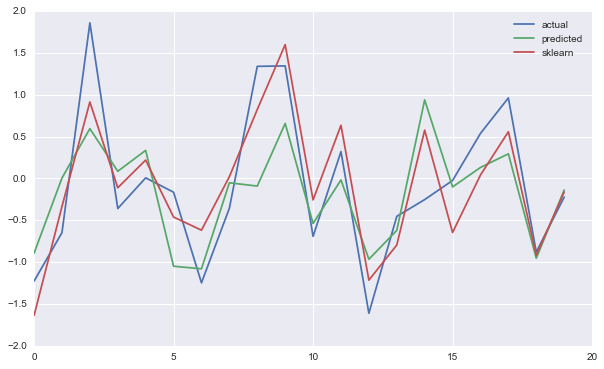

In [2]:
# Number of features
num_features = 5

# Function to generate Dummy data
# Returns X (batch_size, num_features) and y (batch_size)
def get_batch(batch_size=20):
    X = torch.randn((batch_size, num_features))
    X = torch.normal(torch.zeros(batch_size, num_features), torch.zeros(batch_size, num_features).fill_(0.5))
    y = torch.mm(X, torch.randn((num_features, 1)))
    
    # Add noise
    y += torch.normal(torch.zeros(batch_size), torch.zeros(batch_size).fill_(0.1))
    y += torch.Tensor((batch_size)).uniform_(-1, 1)
    
    return Variable(X), Variable(y)

# Linear function
fc = torch.nn.Linear(num_features, 1)

# MSE loss function
mse_loss = torch.nn.MSELoss()

# SGD/Adam optimizer
optimizer = torch.optim.Adam(fc.parameters(), lr=0.05)

# Get the training data
X_train, y_train = get_batch()

for batch_idx in range(20):
    
    # Reset gradients
    fc.zero_grad()
    
    # Forward pass
    output = fc(X_train)
    
    # Compute the loss using the predicted output and y_train
    # loss = F.smooth_l1_loss(output, y_train)
    loss = mse_loss(output, y_train)
    
    # Backward pass
    loss.backward()
    
    # Apply gradients
    optimizer.step()

    # Stop criterion
    if loss.data[0] < 1e-3:
        break
        
    print('Loss: {:.6f} Batch: {}'.format(loss.data[0], batch_idx))

# print weights for debugging
print('Weights: {}'.format(fc.weight))
print('Biases: {}'.format(fc.bias))

# Scikit-learn - for comparison!
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train.data.numpy(), y_train.data.numpy())
y_lr = lr.predict(X_train.data.numpy())

# Plot the actual against the predicted Y
plt.figure(figsize=(10, 6))
plt.plot(y_train.data.numpy().reshape(y_train.size()[0]), label='actual')
plt.plot(output.data.numpy().reshape(output.size()[0]), label='predicted')
plt.plot(y_lr, label='sklearn')
plt.legend()

## word2vec (simplified)

Next, we will try a simplified version of word2vec.

Steps:
1. Download the dataset and create training batches.
1. 